In [176]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import statsmodels.api as sm

## Part 1: Digits 

#### Import data set 

In [103]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

In [93]:
images = digits.images[0:100]

#### Plot data set

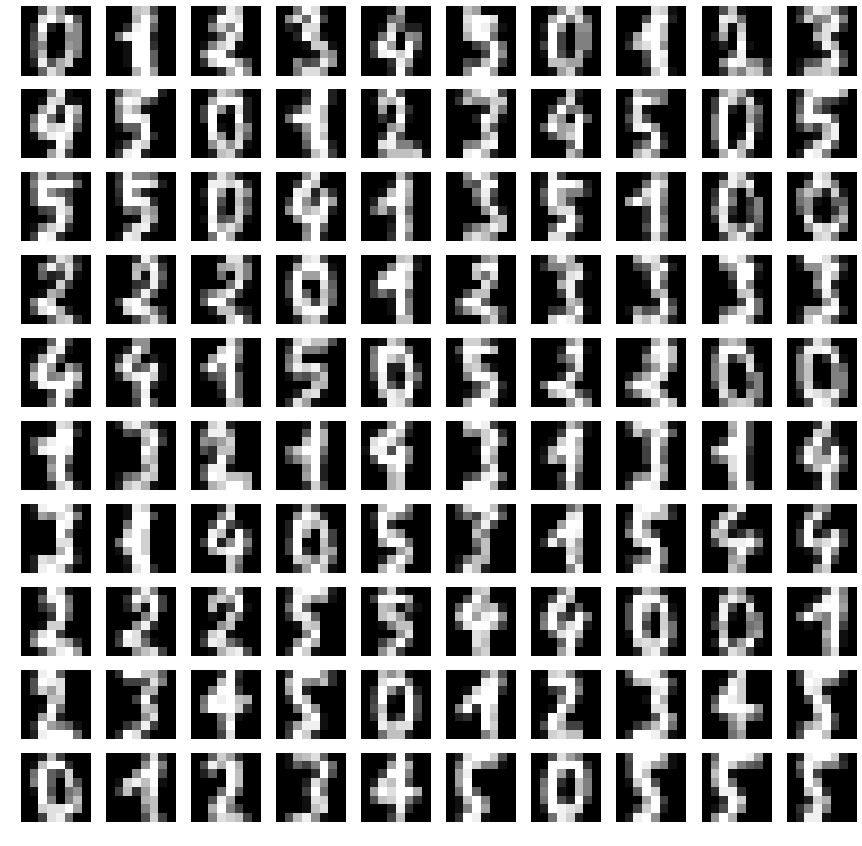

In [84]:
fig, axs = plt.subplots(10,10,figsize=(15,15))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

#### Scale data using standard scaler

In [104]:
ss = StandardScaler()
ss.fit(digits.data)
scaled_data = ss.transform(digits.data)

#### PCA using Sklearn 

In [131]:
pca = PCA(n_components=10)
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_

#### Visualizing explained variance of partial components using Scree plots

Text(0.5, 1.0, 'Scree plot for digits principal components')

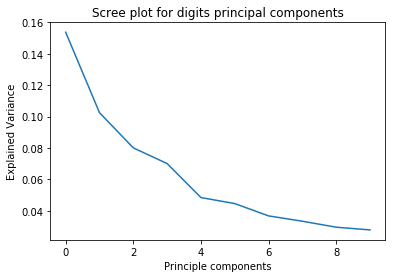

In [127]:
num_components = pca.n_components_
ind = np.arange(num_components)
plt.plot(ind, explained_variance)
plt.ylabel("Explained Variance")
plt.xlabel("Principle components")
plt.title("Scree plot for digits principal components")

## Part 2: Cars

#### Import data 

In [231]:
cars = pd.read_table('data/cars.tsv', header=None)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


#### Data cleaning

In [141]:
new_df = pd.concat([pd.DataFrame(cars.iloc[:,0].str.split().tolist()),
                    pd.DataFrame(cars.iloc[:,1])], axis=1, ignore_index=True)

In [152]:
car_df = new_df[new_df[3] != '?'].iloc[:,:8]

In [153]:
car_df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year', 'origin']

In [156]:
car_df.drop(columns = 'origin', inplace=True)
float_df = car_df.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [174]:
X = float_df.iloc[:, 1:7]
y = float_df.iloc[:, :1]

#### Transform data 

In [235]:
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)
ss.fit(y)
y_scaled = ss.transform(y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Train stats model linear regression without PCA 

In [179]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              3244.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):                        0.00
Time:                        15:39:26   Log-Likelihood:                         -1041.1
No. Observations:                 392   AIC:                                      2094.
Df Residuals:                     386   BIC:                                      2118.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.5226      0.330     -1.586      0.114      -1.171       0.125
displacement     0.0102      0.007      1.383      0.167      -0.004       0.025
horsepower      -0.0209      0.012     -1.707      0.089      -0.045       0.003
weight          -0.0064      0.001     -9.629      0.000      -0.008      -0.005
acceleration    -0.0520      0.093     -0.562      0.574      -0.234       0.130
model_year       0.6103      0.024     25.318      0.000       0.563       0.658
==============================================================================
Omnibus:                       51.461   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.661
Skew:                           0.766   Prob(JB):                     7.57e-21
Kurtosis:                       4.824   Cond. No.                     5.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### PCA / Determine n_components using scree plot

In [196]:
pca = PCA(n_components=6)
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Scree plot for digits principal components')

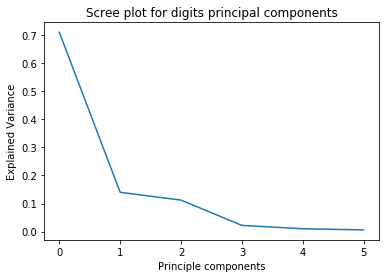

In [197]:
num_components = pca.n_components_
ind = np.arange(num_components)
plt.plot(ind, explained_variance)
plt.ylabel("Explained Variance")
plt.xlabel("Principle components")
plt.title("Scree plot for digits principal components")

In [229]:
pca_cars = PCA(n_components=3)
X_pca = pca_cars.fit_transform(X_scaled)

#### Train stats model linear regression with PCA 

In [230]:
model = sm.OLS(y_scaled,X_pca)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                              467.6
Date:                Mon, 10 Jun 2019   Prob (F-statistic):                   1.34e-128
Time:                        16:29:40   Log-Likelihood:                         -256.86
No. Observations:                 392   AIC:                                      519.7
Df Residuals:                     389   BIC:                                      531.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4077      0.011    -35.607      0.000      -0.430      -0.385
x2             0.1420      0.026      5.509      0.000       0.091       0.193
x3            -0.2946      0.029    -10.228      0.000      -0.351      -0.238
==============================================================================
Omnibus:                       50.429   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.038
Skew:                           0.743   Prob(JB):                     6.27e-21
Kurtosis:                       4.867   Cond. No.                         2.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared explains how much variance in model is explained by features. 
Adjusted R-square penalizes you for adding variables which do not improve your existing model.